<a href="https://colab.research.google.com/github/confusedolive/Jeronimo-CE888/blob/main/Lab06/Country_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.spatial.distance import cdist
from sklearn import cluster, metrics, preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [3]:
path = r'https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv'

data = pd.read_csv(path)
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [14]:
feat = [n for n in data.columns if n != 'country'] #features to scale
test_kmeans = data.copy() #create copy of dataset to test kmeans

# scale data in order to fit to kmeans
scaler = preprocessing.StandardScaler()
scaled = scaler.fit_transform(data[feat])
#Kmeans with 3 clusters, fit_predict scaled
km = cluster.KMeans(n_clusters=3, max_iter=600, n_init=20,
                    random_state=42, init='k-means++')
labels = km.fit_predict(scaled)

test_kmeans['labels'] = labels

test_kmeans.groupby('labels').gdpp.mean()

labels
0     1922.382979
1     6486.452381
2    42494.444444
Name: gdpp, dtype: float64

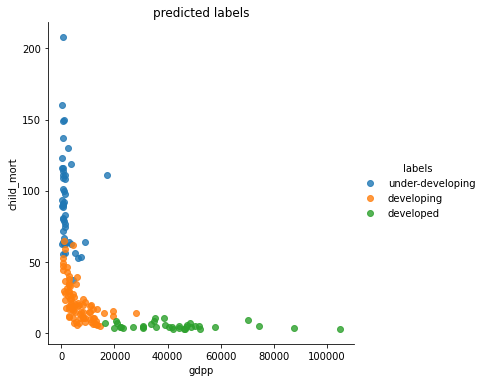

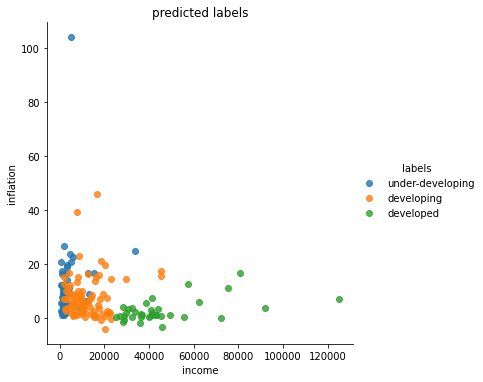

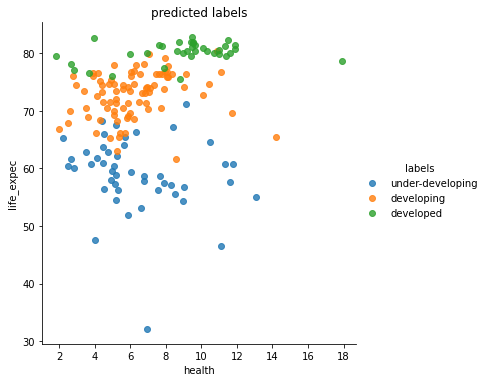

In [15]:
test_kmeans['labels'].replace(
    [0, 1, 2], ['under-developing', 'developing', 'developed'], inplace=True)

def plot_labels(X, Y):
    sns.lmplot(data=test_kmeans, x=X, y=Y, hue='labels',
               fit_reg=False, legend=True, legend_out=True)
    plt.title('predicted labels')

#Plot different variables to see the clusters created
plot_labels('gdpp', 'child_mort')
plot_labels('income', 'inflation')
plot_labels('health', 'life_expec')

In [13]:
test_kmeans.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,under-developing
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,developing
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,developing
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,under-developing
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,developing


In [16]:
import plotly.express as px

#Plotting 2 PCA components clusters
pca = PCA(n_components=2)
components = pca.fit_transform(scaled)

fig = px.scatter(components, x=0, y=1, color=test_kmeans['labels'], 
                labels={'0': 'PC 1',
                        '1': 'PC 2'},
                title='Country clusters plotted')
fig.show()